In [1]:
import re
import pandas as pd
from konlpy.tag import Twitter, Komoran
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import pyLDAvis.gensim
from pandas.io.json import json_normalize
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import openpyxl
import os
from datetime import datetime

In [2]:
def flatten(l): 
    flatList = [] 
    for elem in l: 
        if type(elem) == list: 
            for e in elem: 
                flatList.append(e) 
        else: 
            flatList.append(elem) 
    return flatList
    
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [3]:
Data = pd.read_csv("./중복제거_대입대입정책.csv", encoding = 'CP949')
Data = Data.drop_duplicates('타이틀',keep='first')
Data=Data[['키워드','타이틀','생산연도']]

In [4]:
print(Data.head())

키워드                                        타이틀    생산연도
0  대입정책  ‘2008학년도 이후 대학입학전형제도 개선안'을 둘러싼 갈등 전개과정 분석  2005.0
2  대입정책                  ‘사교육'에 대한 입학사정관 전형의 영향 분석  2012.0
4  대입정책                             ‘삼국지'의 한국적 정전화  2016.0
6  대입정책   ‘창의적 체험활동 교육과정'의 활성화를 위한 ‘에듀팟' 활용에 관한 연구  2015.0
8  대입정책                  ‘학생부' 중심 대입제도개혁에 대한 쟁점 분석  2018.0


In [5]:
Data_contents = list(Data['타이틀'])

In [7]:
import MeCab
m=MeCab.Tagger()

In [8]:
custom_words=['1단계합격','1단계합격자','1대1면접','1대다(多)면접','가산점','가중치','개별면접','결격','결원','고른기회전형','고사','공정성','공통원서접수','교차지원','구술면접','구조화면접','기본점수','내신','논술위주전형','다대다면접','다대일면접','단계별전형','대입전형시행계획','대학별고사','대학수학능력시험 반영영역','대학수학능력시험 응시영역','대학수학능력시험 필수응시영역','대학입학전형 기본사항','동점자 처리기준','등록예치금','등록포기','명목 반영비율','모집군','모집단위','모집인원','미등록','미충원인원 ','반구조화면접 ','발표면접','백분위','변환표준점수','복수지원','분할모집','비구조화면접','사정','서류작성금지항목','서류평가','서류확인면접','선발비율','선발원칙','수능','수능위주전형','수시모집','수학능력미달','실기위주전형','실사','실질반영비율','심층면접','예비합격순위','예비합격자','유동제','유사도','유사도검색시스템','이월인원','이중등록','인·적성면접','인성면접','일괄합산전형','입학사정관','입학전형','자기소개서','적성면접','전형','전형료비례환불','전형료일부환불','전형방법','전형요소','전형자료','전형취지 부합도평가','정량평가','정성평가','정시모집','정시이월','정원내전형','정원외전형','중복지원금지','지원자격미달','지원자격위반','지원횟수위반','집단토론면접','최대모집 가능인원','최종등록','최종합격','최초합격','추가모집','출제문항면접','충원','충원합격','투명성','특기자전형','평가','평가기준','평가방법','평가요소','평가준거','평가지표','평가항목','표준점수','학교생활기록부 성적반영 대상자','학교생활기록부 온라인 제공 동의자','학교생활기록부 온라인 제공 비대상교','학교소개서','학생부교과','학생부교과 성적대체점수','학생부교과 성적대체점수 적용대상자','학생부교과전형','학생부비교과','학생부위주전형','학생부종합전형','학업역량면접','환산점수','활동증빙자료','활용점수','참여정부','이명박정부','박근혜정부','문재인정부','노무현정부','3불정책','입학사정관제','학생부종합전형','수시','정시','교과','실기','특기자','논술','특목고','자사고','외고','교육과정','고등학교','고교','교원','교사','교사추천서','등급','표준점수','원점수','백분위','수능','대학수학능력시험','대교협','한국대학교육협의회','고교학점제','상대평가','절대평가','선택과목','기여입학','학종','소외계층','교육과정','2015개정교육과정','학교생활기록부','교과','비교과','봉사','독서','학교폭력','동아리','사교육','학생부',' 면접','교과교실제','자유학기제']

In [9]:
Data_terms=[]
Index=[]
for i in range(len(Data_contents)):
    try:
        Data_terms.append([x.split("\t")[0] for x in m.parse(Data_contents[i]).split("\n") if "NNG" in x or "VA" in x or "NNP" in x])
        Index.append(i)
    except Exception as e:
        print(e)

In [10]:
Data=Data.iloc[Index,:]

In [11]:
Data

,키워드,타이틀,생산연도
0,대입정책,‘2008학년도 이후 대학입학전형제도 개선안'을 둘러싼 갈등 전개과정 분석,2005.0
2,대입정책,‘사교육'에 대한 입학사정관 전형의 영향 분석,2012.0
4,대입정책,‘삼국지'의 한국적 정전화,2016.0
6,대입정책,‘창의적 체험활동 교육과정'의 활성화를 위한 ‘에듀팟' 활용에 관한 연구,2015.0
8,대입정책,‘학생부' 중심 대입제도개혁에 대한 쟁점 분석,2018.0
...,...,...,...
5340,대입정책,후반기 학술대회 논문 및 현암 이을호 연문논문 연보 : 현암 이을호의 삶과 학문,2010.0
5341,대입,訓?의 관점에서 바라본 성립기의 朝鮮 孟子學 -『四書釋義·孟子』와 『四書辨疑·孟子』...,2008.0
5342,대입정책,휴학학기 수에 대한 결정요인 분석,2014.0
5343,대입,흉쇄유돌근 수축도의 보정이 전정유발근전위 결과에 미치는 영향,2014.0


In [12]:
Data=Data.reset_index(drop=True)

In [13]:
Data_terms = [[y for y in x if len(y)>1] for x in Data_terms] # 한글자 이상인 단어만 추출

In [14]:
Data_terms = [[y for y in x if y not in ["기자","무단","배포","메일","금지","전재","뉴스","연합뉴스","저작권자"]] for x in Data_terms] # 쓸데없는 단어 제거

In [15]:
Data['terms']=Data_terms

In [16]:
len(Data)

5135

In [17]:
Data['생산연도']

0       2005.0
1       2012.0
2       2016.0
3       2015.0
4       2018.0
         ...  
5130    2010.0
5131    2008.0
5132    2014.0
5133    2014.0
5134    2011.0
Name: 생산연도, Length: 5135, dtype: float64

In [18]:
for i in range(len(Data)):
    print(i)
    for j in range(len(custom_words)):
        if not custom_words[j] in Data_terms[i]:
            Data_terms[i]=Data_terms[i]+list(np.repeat(custom_words[j], Data.contents[i].count(custom_words[j])))

0


AttributeError: 'DataFrame' object has no attribute 'contents'

In [19]:
if(os.path.isdir("./분석")):
    Data.to_excel('./분석/전처리파일.xlsx')
else:
    os.mkdir("./분석")
    Data.to_excel('./분석/전처리파일.xlsx')

In [20]:
# 전체 tf
(pd.Series(flatten(Data_terms)).value_counts())
pd.Series(flatten(Data_terms)).value_counts().to_excel("./분석/전체tf.xlsx")

In [21]:
if(os.path.isdir("./Util")):
    pass
else:
    os.mkdir("./Util")

mask_circle=np.array(Image.open("./Util/mask-cloud.png"))

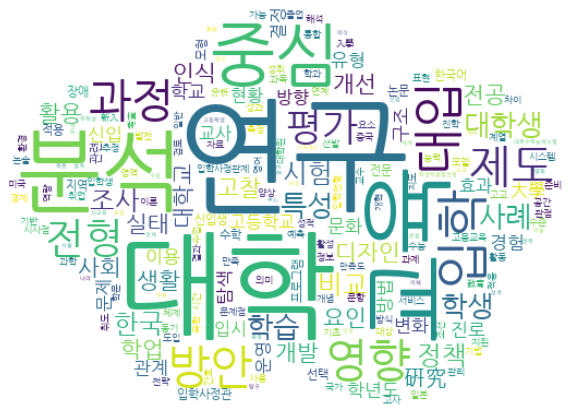

In [22]:
font_path = './Util/NanumGothic.ttf'
count = Counter(flatten(Data_terms))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./분석/전체워드클라우드_tf.png')

In [23]:
# 전체 tf-idf
Data_terms2=[" ".join(x) for x in Data_terms]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./분석/전체tf-idf.xlsx")

In [24]:
result

,tfidf
대학,209.014643
연구,204.379288
교육,149.359170
분석,141.327487
중심,108.994748
...,...
擧動,0.173946
强度,0.173946
小引,0.173946
시험편,0.173946


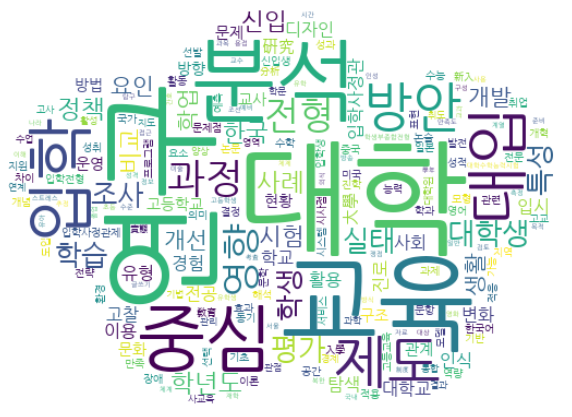

In [25]:
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
get_ipython().run_line_magic('matplotlib', 'inline')
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./분석/전체워드클라우드_tfidf.png')

In [26]:
# 연도별 분석
np.unique(Data['생산연도'])

array([1927., 1934., 1939., 1957., 1961., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
         nan,   nan])

In [27]:
years=['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020']

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


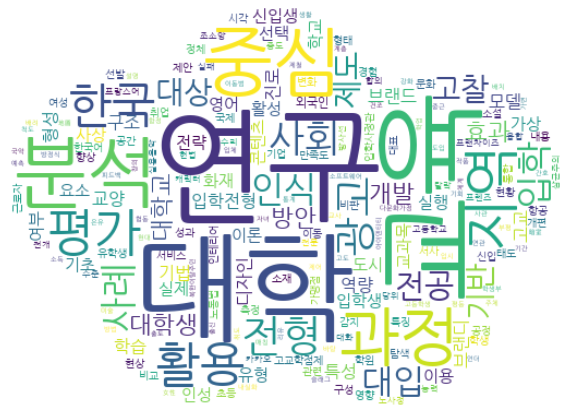

In [28]:
for i in years:
    print(i)
    Data_terms_temp=[Data_terms[x] for x in np.where(Data['생산연도']== int(i))[0]]
    pd.Series(flatten(Data_terms_temp)).value_counts().to_excel("./분석/연도별tf_temp"+str(i)+".xlsx")
    count = Counter(flatten(Data_terms_temp))
    wc = WordCloud(
        font_path = font_path,
        mask=mask_circle,
        background_color="white"
    )
    wordcloud = wc.generate_from_frequencies(count)
    array = wordcloud.to_array()
    get_ipython().run_line_magic('matplotlib', 'inline')
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig('./분석/연도별워드클라우드_tf_temp'+str(i)+'.png')
    Data_terms2=[" ".join(x) for x in Data_terms_temp]
    tfidv = TfidfVectorizer().fit(Data_terms2)
    temp = tfidv.transform(Data_terms2)
    result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
    result=result.sort_values(by='tfidf',ascending=False)
    result.to_excel("./분석/연도별tf-idf_"+str(i)+".xlsx")
    font_path = './Util/NanumGothic.ttf'
    count = Counter(dict(result['tfidf']))
    wc = WordCloud(
        font_path = font_path,
        mask=mask_circle,
        background_color="white"
    )
    wordcloud = wc.generate_from_frequencies(count)
    array = wordcloud.to_array()
    get_ipython().run_line_magic('matplotlib', 'inline')
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    fig.savefig('./분석/연도별워드클라우드_tfidf_'+str(i)+'.png')

In [30]:
#A정권 2009-2013.2.24. B정권 2013.2.25.~2017.3.10. C정권 2017.5.10~현재
# 정권별 분석


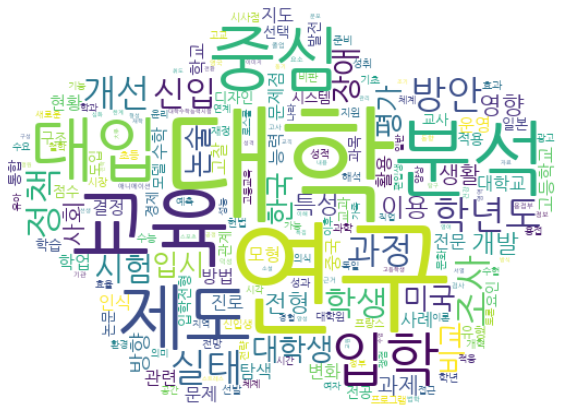

In [33]:
Index_temp=np.where((Data['생산연도']>=int(2003)) & ((Data['생산연도']<=int(2007))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms_temp)).value_counts().to_excel("./분석/정권별tf_A.xlsx")
count = Counter(flatten(Data_terms_temp))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tf_A.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./분석/정권별tf-idf_A.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tfidf_A.png')

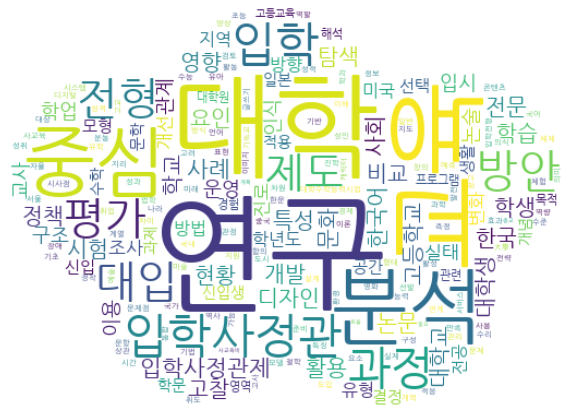

In [34]:
#B정권
Index_temp=np.where((Data['생산연도']>=int(2008)) & ((Data['생산연도']<=int(2012))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms_temp)).value_counts().to_excel("./분석/정권별tf_B.xlsx")
count = Counter(flatten(Data_terms_temp))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tf_B.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./분석/정권별tf-idf_B.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tfidf_B.png')

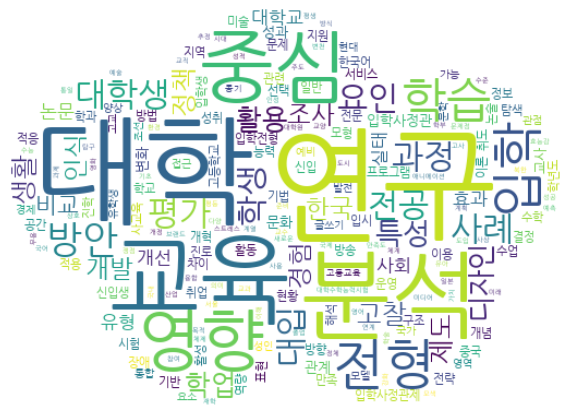

In [35]:
#C정권
Index_temp=np.where((Data['생산연도']>=int(2013)) & ((Data['생산연도']<=int(2016))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms_temp)).value_counts().to_excel("./분석/정권별tf_C.xlsx")
count = Counter(flatten(Data_terms_temp))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tf_C.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./분석/정권별tf-idf_C.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tfidf_C.png')

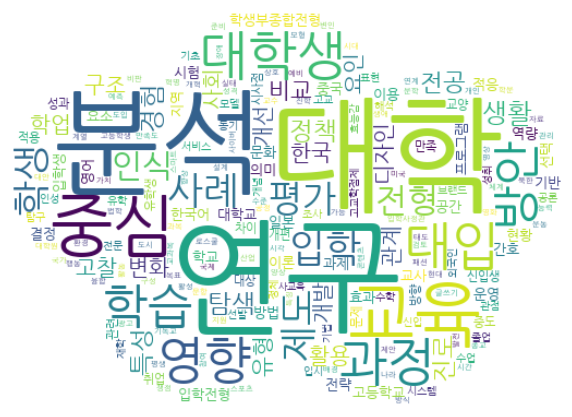

In [36]:
#C정권
Index_temp=np.where((Data['생산연도']>=int(2017)) & ((Data['생산연도']<=int(2020))))[0]
Data_terms_temp=[Data_terms[x] for x in Index_temp]
pd.Series(flatten(Data_terms_temp)).value_counts().to_excel("./분석/정권별tf_D.xlsx")
count = Counter(flatten(Data_terms_temp))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tf_DC.png')
Data_terms2=[" ".join(x) for x in Data_terms_temp]
tfidv = TfidfVectorizer().fit(Data_terms2)
temp = tfidv.transform(Data_terms2)
result=pd.DataFrame(list(temp.toarray().sum(axis = 0)),index=tfidv.get_feature_names(),columns=['tfidf'])
result=result.sort_values(by='tfidf',ascending=False)
result.to_excel("./분석/정권별tf-idf_D.xlsx")
font_path = './Util/NanumGothic.ttf'
count = Counter(dict(result['tfidf']))
wc = WordCloud(
    font_path = font_path,
    mask=mask_circle,
    background_color="white"
)
wordcloud = wc.generate_from_frequencies(count)
array = wordcloud.to_array()
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig('./분석/정권별워드클라우드_tfidf_D.png')